In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_titanic[df_titanic.isnull().any(axis=1)] #mostra todas as linhas que tenha alguma informação nula em qualquer coluna
df_titanic[~df_titanic.isnull().any(axis=1)] #mostra todas as linhas que não tenha alguma informação nula em qualquer coluna

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


📦 *Etapa 1 — Carregamento e Diagnóstico Inicial*

- Quais são os nomes das colunas?

- Quais colunas têm valores ausentes?

- Qual a média de idade dos passageiros?

In [4]:
df_titanic.columns
# as colunas são 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
colunas_nulas = df_titanic.columns[df_titanic.isnull().any()]
colunas_nulas
# as colunas que tem coisas nulas são 'Age', 'Cabin', 'Embarked'

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [6]:
linhas_nulas = df_titanic[df_titanic.isnull().any(axis=1)].index
linhas_nulas # aqui mostra o índice das linhas que tem nulo

Index([  0,   2,   4,   5,   7,   8,   9,  12,  13,  14,
       ...
       878, 880, 881, 882, 883, 884, 885, 886, 888, 890],
      dtype='int64', length=708)

In [7]:
media_age = round(df_titanic['Age'].mean(), 1)
media_age
# a idade média é 29.7 anos

29.7

🧹*Etapa 2 — Limpeza e Preparação*

- Preencha os valores ausentes da coluna Age com a média arredondada da idade.

- Preencha os valores ausentes da coluna Embarked com o valor mais frequente.

- Crie uma nova coluna chamada Faixa_Etaria com as seguintes categorias:
Criança se idade < 12

Adolescente se idade entre 12 e 17

Adulto se idade entre 18 e 59

Idoso se idade ≥ 60

In [8]:
df_titanic.loc[df_titanic['Age'].isnull(), 'Age'] = media_age #substituí tudo que é nulo pela media só na coluna age usando .loc

In [9]:
df_titanic['Embarked'] = df_titanic['Embarked'].fillna('S') #substituí usando o fillna
df_titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [10]:
condicoes = [
    df_titanic['Age'] >= 60,
    df_titanic['Age'] >= 18,
    df_titanic['Age'] >= 12,
    df_titanic['Age'] < 12
]

valores = ['Idoso', 'Adulto', 'Adolescente', 'Criança']

df_titanic['Faixa_Etaria'] = np.select(condicoes, valores)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Faixa_Etaria
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adulto


📊 *Etapa 3 — Análise com Pandas e Numpy*

- Qual a taxa de sobrevivência geral dos passageiros?

- Qual a taxa de sobrevivência por:

- Sexo (Sex)

- Classe (Pclass)

- Faixa etária (Faixa_Etaria)

- Quantas pessoas tinham o nome contendo 'Dr.'? E quantas delas sobreviveram?

In [11]:
sobreviventes = df_titanic.loc[df_titanic['Survived'] == 1, 'Survived'].count()
total_pessoas = df_titanic['Survived'].count()
taxa_sobrevivência = sobreviventes / total_pessoas
taxa_sobrevivência*100 #taxa de sobrevivência geral

38.38383838383838

In [12]:
sobreviventes_mulheres = df_titanic.loc[(df_titanic['Survived'] == 1) & (df_titanic['Sex'] == 'female'), 'Sex'].count()
print(sobreviventes_mulheres / total_pessoas * 100) #sobrevivente de cada classe em relação ao geral

sobreviventes_homens = df_titanic.loc[(df_titanic['Survived'] == 1) & (df_titanic['Sex'] == 'male'), 'Sex'].count()
print(sobreviventes_homens / total_pessoas * 100) #sobrevivente de cada classe em relação ao geral
df_titanic.groupby('Sex')['Survived'].mean() * 100 #sobrivente de cada classe dentro do gruupo de cada classe

26.15039281705948
12.2334455667789


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [13]:
df_titanic['Pclass'].value_counts()
sobreviventes_classe1 = df_titanic.loc[(df_titanic['Survived'] == 1) & (df_titanic['Pclass'] == 1), 'Sex'].count()
sobreviventes_classe2 = df_titanic.loc[(df_titanic['Survived'] == 1) & (df_titanic['Pclass'] == 2), 'Sex'].count()
sobreviventes_classe3 = df_titanic.loc[(df_titanic['Survived'] == 1) & (df_titanic['Pclass'] == 3), 'Sex'].count()
print(sobreviventes_classe1 / total_pessoas * 100)
print(sobreviventes_classe2 / total_pessoas * 100)
print(sobreviventes_classe3 / total_pessoas * 100)

15.26374859708193
9.764309764309765
13.35578002244669


In [14]:
sobreviventes_por_classe = df_titanic[df_titanic['Survived'] == 1].groupby('Pclass')['Sex'].count() #sex aqui pode ser qualquer coluna não nula
print(sobreviventes_por_classe / len(df_titanic) * 100) #sobrevivente de cada classe em relação ao geral
df_titanic.groupby('Pclass')['Survived'].mean() * 100 #sobrivente de cada classe dentro do gruupo de cada classe

Pclass
1    15.263749
2     9.764310
3    13.355780
Name: Sex, dtype: float64


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [15]:
sobreviventes_faixa_etaria = df_titanic[df_titanic['Survived'] == 1].groupby('Faixa_Etaria')['Sex'].count()
print(sobreviventes_faixa_etaria)
print(sobreviventes_faixa_etaria / len(df_titanic)*100) #sobrevivente de cada classe em relação ao geral
df_titanic.groupby('Faixa_Etaria')['Survived'].mean()*100 #sobrivente de cada classe dentro do gruupo de cada classe

Faixa_Etaria
Adolescente     22
Adulto         274
Criança         39
Idoso            7
Name: Sex, dtype: int64
Faixa_Etaria
Adolescente     2.469136
Adulto         30.751964
Criança         4.377104
Idoso           0.785634
Name: Sex, dtype: float64


Faixa_Etaria
Adolescente    48.888889
Adulto         36.436170
Criança        57.352941
Idoso          26.923077
Name: Survived, dtype: float64

In [16]:
pessoas_dr = df_titanic.loc[df_titanic['Name'].str.contains(r'\bDr\.', case=False, na=False), 'Name'].count() # 7 pessoas com o Dr. no nome
sobreviventes_dr = df_titanic.loc[df_titanic['Name'].str.contains(r'\bDr\.', case=False, na=False) & (df_titanic['Survived'] == 1), 'Name'].count() #3 sobreviventes
print(pessoas_dr)
print(sobreviventes_dr)
print(sobreviventes_dr/len(df_titanic)*100) #porcentagem em relação ao total
print(sobreviventes_dr/pessoas_dr*100) #porcentagem viva dentro da classe

7
3
0.33670033670033667
42.857142857142854


📈 *Etapa 4 — Desafio com Matplotlib*

Use matplotlib.pyplot para criar:
- Um histograma da idade dos passageiros.
- Um gráfico de barras comparando a taxa de sobrevivência por classe.

Text(0.5, 1.0, 'Quantidade de Pessoas por Idade')

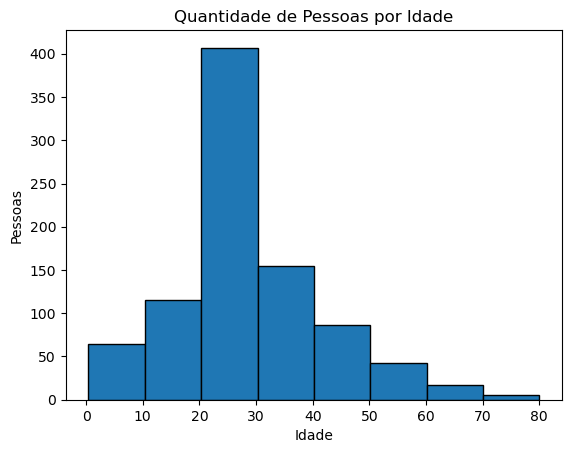

In [59]:
plt.hist(df_titanic['Age'], bins=8, edgecolor= 'black')
plt.xlabel('Idade')
plt.ylabel('Pessoas')
plt.title('Quantidade de Pessoas por Idade')

Text(0.5, 1.0, 'Sobreviventes por Classe')

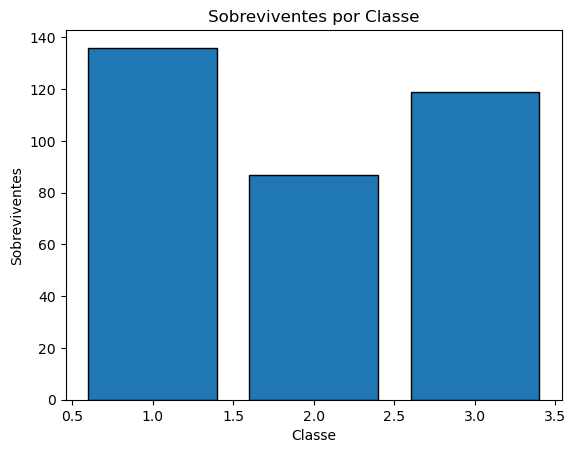

In [60]:
plt.bar(df_titanic.groupby('Pclass')['Survived'].sum().index ,df_titanic.groupby('Pclass')['Survived'].sum().values, edgecolor = 'black')
plt.xlabel('Classe')
plt.ylabel('Sobreviventes')
plt.title('Sobreviventes por Classe')